<a href="https://colab.research.google.com/github/gulistanburtek/tez/blob/main/tez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_excel("/content/drive/MyDrive/tez/TrainingDataset.xlsx")
X = np.loadtxt("/content/drive/MyDrive/tez/Inputs.txt")
y = np.loadtxt("/content/drive/MyDrive/tez/Target.txt") 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.796182     0.796098  0.796141     0.796140      0.796140
recall        0.799629     0.792607  0.796141     0.796118      0.796141
f1-score      0.797902     0.794349  0.796141     0.796125      0.796137
support    3234.000000  3192.000000  0.796141  6426.000000   6426.000000
_______________________________________________
Confusion Matrix: 
 [[2586  648]
 [ 662 2530]]

Test Result:
Accuracy Score: 78.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.779810     0.793800  0.786855     0.786805      0.786932
recall        0.788462     0.785307  0.786855     0.786884      0.786855
f1-score      0.784112     0.789530  0.786855     0.786821      0.786870
support    1352.000000  1402.000

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [9]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 35)  # XGBRegressor   XGBClassifier

xg_reg.fit(X_train,y_train)

 
from sklearn import metrics
from sklearn.metrics import accuracy_score



# predict the results
y_predtrain = xg_reg.predict(X_train)
y_predtest = xg_reg.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_predtest))

Training Accuracy: 0.8667911609088079
Testing Accuracy: 0.8416848220769789


In [10]:
data.tail()

,Fire,eucdistRoads,EucDistWater,HillSha2,Slope2,Aspect,elevation,Landuse
9191,1,0.025364,0.062051,156,14.387210,68.55226,886,321
9192,0,0.043549,0.071987,<Null>,22.296010,27.89727,1027,321
9193,0,0.034609,0.079308,183,16.779840,33.46538,1128,243
9194,0,0.030650,0.075986,98,22.328590,138.36650,1064,324
9195,0,0.038110,0.083656,192,4.152643,310.23640,1213,243


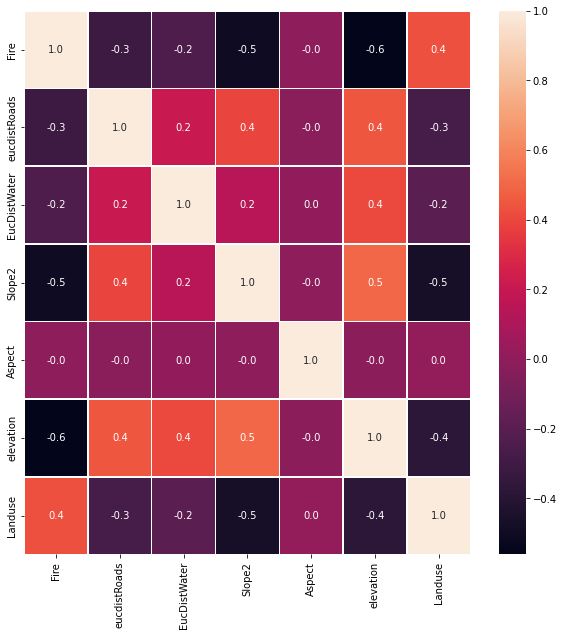

In [11]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

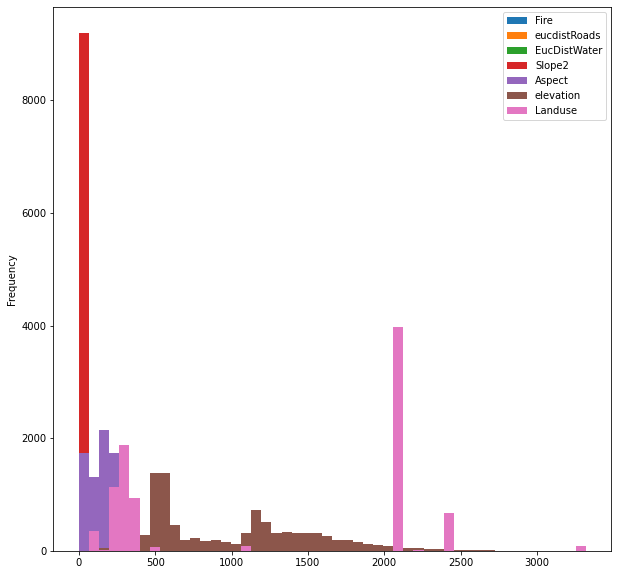

In [12]:
data.plot(kind = 'hist',bins = 50,figsize = (10,10))
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9934d2acd0>,
      dtype=object)

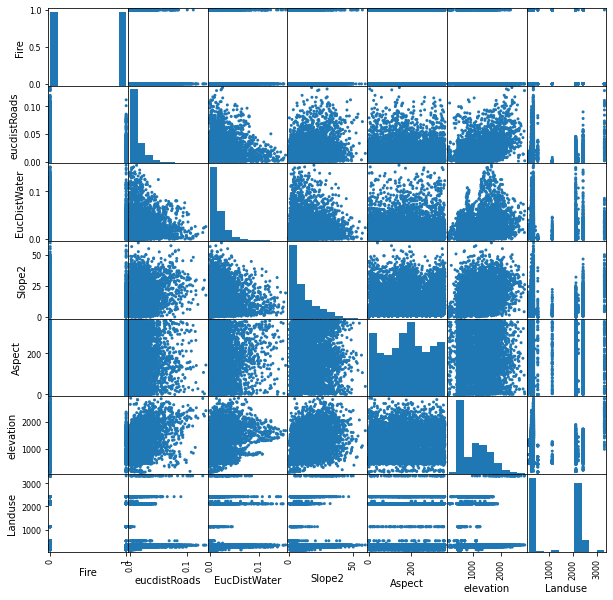

In [13]:
pd.plotting.scatter_matrix(data, alpha=1, figsize=(10, 10), diagonal='hist')

In [14]:
data.head()

,Fire,eucdistRoads,EucDistWater,HillSha2,Slope2,Aspect,elevation,Landuse
0,0,0.050095,0.124456,148,11.070420,101.309900,2036,333
1,0,0.004191,0.074463,184,2.210947,6.340192,1889,2111
2,0,0.045259,0.081780,178,2.183844,206.565000,2036,333
3,0,0.022879,0.086218,154,9.314680,98.972630,2051,333
4,1,0.017334,0.082687,161,10.842260,196.821400,1917,243
